In [ ]:
# Experiment 3: Bayesian Curve Fitting

In [ ]:
# Run all cells sequentially to get the output

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def variance(alpha, beta, new_x, x_vec, D):
    # calculate variance for given parameters
    assert isinstance(alpha, float), "Alpha has to be a float."
    assert isinstance(beta, float),  "Beta has to be a float."
    assert isinstance(new_x, float), "New_x has to be a float."
    assert x_vec.shape[1] == 1,      "x_vec has to be a column vector."
    assert isinstance(D, int),       "Dimensions has to be an integer."

    S = matrix_S(alpha,beta,x_vec, D)
    return (1/beta)+(phi(new_x, D).T.dot(S).dot(phi(new_x, D)))[0][0]

def phi(x, D):
    assert isinstance(x, float), "x should be a float."
    assert isinstance(D, int), "Dimension D, should be an integer."

    dimension = D + 1  # We are including a constant here.
    returnVector = [0] * dimension
    for i in range(dimension): returnVector[i] += x ** i

    returnVector = np.array(returnVector)
    returnVector = returnVector.reshape(returnVector.shape + (1,))

    return returnVector

def mean(alpha, beta, new_x, target_vec, x_vec, D):
    # calculate mean for given parameters
    assert isinstance(alpha, float), "Alpha should be a float."
    assert isinstance(beta, float),  "Beta should be a float."
    assert isinstance(new_x, float), "new_x should be a float."
    assert target_vec.shape[1] == 1, "target_vec should be a column vector."
    assert x_vec.shape[1] == 1,      "x_vec should be a column vector."
    assert isinstance(D, int),       "Dimension should be an integer."
    assert len(target_vec)==len(x_vec), "x_vec and target_vec must be of the same dimensionality."

    sum_vec_x = 0
    for i in range(len(x_vec)): sum_vec_x += phi(x_vec[i][0], D) * target_vec[i][0]

    S = matrix_S(alpha, beta, x_vec, D)

    return beta * ((phi(new_x, D).T.dot(S)).dot(sum_vec_x))[0][0]

def matrix_S(alpha, beta, x_vec, D):
    assert isinstance(alpha, float), "Alpha is not a float."
    assert isinstance(beta, float),  "Beta is not a float."
    assert isinstance(D, int),       "Dimension is not an int."
    assert x_vec.shape[1] == 1, "x_vec must be a column vector."

    first_expr  = alpha*np.eye(D+1)
    second_expr = 0
    for i in range(len(x_vec)): second_expr += phi(x_vec[i][0], D).dot(phi(x_vec[i][0],D).T)
    return np.linalg.inv(first_expr+beta*second_expr)

In [3]:
a = phi(2.,2)
a.dot(a.T)
a = np.array([1,2,3])
I = np.eye(len(a))

np.dot(a,I)

array([1., 2., 3.])

In [4]:
alpha = 5*10**(-3)
beta = 11.1
M = 9

In [5]:
x_vec = np.linspace(-5,0,200)
x_vec = x_vec.reshape(x_vec.shape + (1,))
t_vec = np.array([np.sin(x+np.random.normal(0,np.sqrt(1/beta))) for x in x_vec])
t_vec = t_vec.reshape(t_vec.shape + (1,))

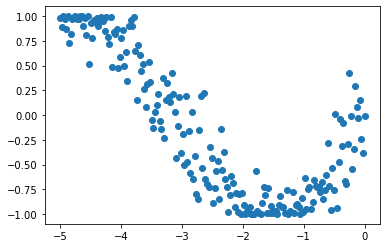

In [6]:
plt.scatter(x_vec,t_vec)
plt.show()

In [7]:
x_predict = np.array(np.linspace(0.,5.,200))
x_predict = x_predict.reshape(x_predict.shape + (1,))
y_predict = np.array([np.sin(x+np.random.normal(0,np.sqrt(1/beta))) for x in x_predict])
y_predict = y_predict.reshape(y_predict.shape + (1,))

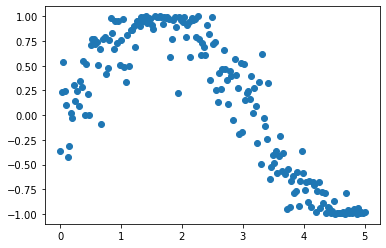

In [8]:
plt.scatter(x_predict,y_predict)
plt.show()

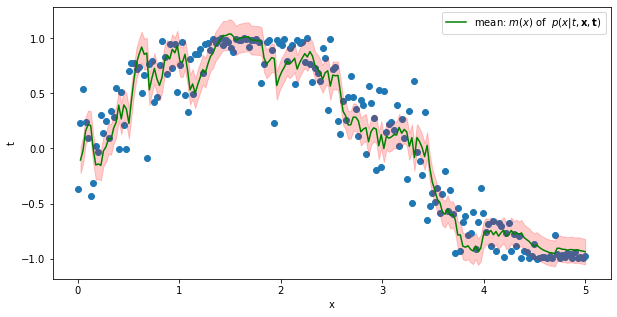

In [9]:
means     = [0.] * (len(x_predict) - 1)  # Important, have 0., otherwise will be an array of integers.
variances = [0.] * (len(x_predict) - 1)

for i in range(len(x_predict) - 1):
    x_vec = np.append(x_vec,x_predict[i]) # x_vec
    x_vec = x_vec.reshape(x_vec.shape + (1,))
    t_vec = np.append(t_vec,y_predict[i]) # target_vec
    t_vec = t_vec.reshape(t_vec.shape + (1,))
    new_datapoint = x_predict[i + 1]
    new_x = new_datapoint[0]
    p_t_mean = mean(  alpha,  beta, new_x, t_vec, x_vec, M)
    p_t_var = variance(alpha, beta, new_x, x_vec, M)
    means[i] = p_t_mean
    variances[i] = (1*p_t_var + means[i], means[i] - 1*p_t_var)

f = plt.figure(figsize=(10,5))
ax = f.add_subplot(111)

ax.scatter(x_predict,y_predict)
ax.plot(x_predict[1:],means,c='green')
miny = [y[1] for y in variances]
maxy = [y[0] for y in variances]
ax.fill_between(x_predict[1:].T[0],miny,maxy,alpha=0.2,color='red')

ax.legend(['mean: $m(x)$ of  $p(x|t,\mathbf{x},\mathbf{t})$'],fontsize=10)

ax.set_xlabel('x')
ax.set_ylabel('t')
plt.show()

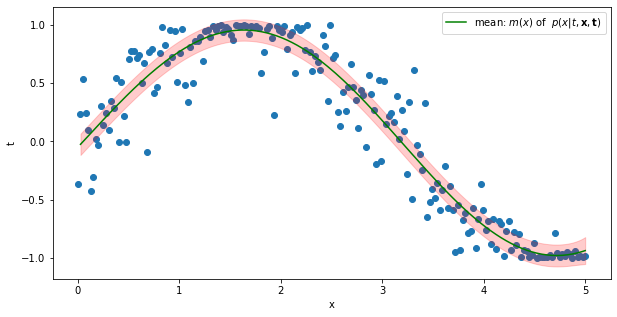

In [10]:
means     = [0.] * (len(x_predict) - 1)  # Important, have 0., otherwise will be an array of integers.
variances = [0.] * (len(x_predict) - 1)

for i in range(len(x_predict) - 1):
    new_datapoint = x_predict[i + 1]
    new_x = new_datapoint[0]
    p_t_mean = mean(  alpha,  beta, new_x, t_vec, x_vec, M)
    p_t_var = variance(alpha, beta, new_x, x_vec, M)
    means[i] = p_t_mean
    variances[i] = (1*p_t_var + means[i], means[i] - 1*p_t_var)

f = plt.figure(figsize=(10,5))
ax = f.add_subplot(111)

ax.scatter(x_predict,y_predict)
ax.plot(x_predict[1:],means,c='green')
miny = [y[1] for y in variances]
maxy = [y[0] for y in variances]
ax.fill_between(x_predict[1:].T[0],miny,maxy,alpha=0.2,color='red')

ax.legend(['mean: $m(x)$ of  $p(x|t,\mathbf{x},\mathbf{t})$'],fontsize=10)

ax.set_xlabel('x')
ax.set_ylabel('t')
plt.show()
